In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00a 0:00:01


In [ ]:
# Reference: https://pytorch.org/hub/intelisl_midas_v2/

In [2]:
import cv2
import torch

In [3]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /pt/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

In [5]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /pt/torch/hub/intel-isl_MiDaS_master


In [6]:
import os.path
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")

if os.path.isfile(filename):
    print("Image file exists")
else:
    import urllib.request
    urllib.request.urlretrieve(url, filename)
    print("Image file downloaded")

Image file exists


In [7]:
imgname = filename
img = cv2.imread(imgname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

In [8]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

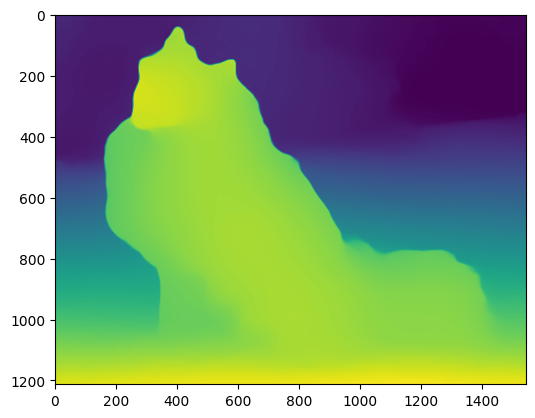

In [9]:
import matplotlib.pyplot as plt
plt.imshow(output, cmap='viridis')

In [10]:
output.shape

(1213, 1546)

In [11]:
output

array([[ 4.144982  ,  4.146505  ,  4.148303  , ...,  0.39970982,
         0.4140788 ,  0.41885683],
       [ 4.1474338 ,  4.1488314 ,  4.1503572 , ...,  0.39394695,
         0.40723428,  0.41166943],
       [ 4.155056  ,  4.1560473 ,  4.156666  , ...,  0.37761748,
         0.3875133 ,  0.39087418],
       ...,
       [34.09204   , 34.094257  , 34.101494  , ..., 34.85834   ,
        34.85139   , 34.849594  ],
       [34.085     , 34.089092  , 34.10287   , ..., 34.892708  ,
        34.874043  , 34.86888   ],
       [34.085594  , 34.090183  , 34.105606  , ..., 34.904987  ,
        34.882706  , 34.876507  ]], dtype=float32)